### 必要なデータだけnpyに保存する

In [21]:
"""
6.7.1ステートフルLSTMで電気消費の予測の前準備
"""
# -*- coding: utf-8 -*-
from __future__ import division, print_function
import os
import re

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


DATA_DIR = "./data"

1000 lines read
2000 lines read
3000 lines read
4000 lines read
5000 lines read
6000 lines read
7000 lines read
8000 lines read
9000 lines read
10000 lines read
11000 lines read
12000 lines read
13000 lines read
14000 lines read
15000 lines read
16000 lines read
17000 lines read
18000 lines read
19000 lines read
20000 lines read
21000 lines read
22000 lines read
23000 lines read
24000 lines read
25000 lines read
26000 lines read
27000 lines read
28000 lines read
29000 lines read
30000 lines read
31000 lines read
32000 lines read
33000 lines read
34000 lines read
35000 lines read
36000 lines read
37000 lines read
38000 lines read
39000 lines read
40000 lines read
41000 lines read
42000 lines read
43000 lines read
44000 lines read
45000 lines read
46000 lines read
47000 lines read
48000 lines read
49000 lines read
50000 lines read
51000 lines read
52000 lines read
53000 lines read
54000 lines read
55000 lines read
56000 lines read
57000 lines read
58000 lines read
59000 lines read
60000 

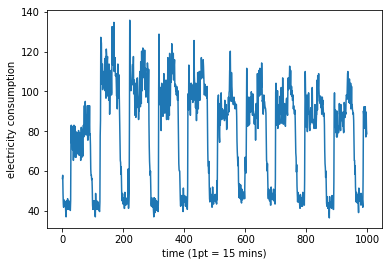

In [3]:
# # 顧客番号(cid)250番の電気消費データを抽出
# with open(os.path.join(DATA_DIR, "LD2011_2014.txt"), "r") as fld:
#     data = []
#     cid = 250
#     for line_num, line in enumerate(fld):
#         if line.startswith("\"\";"):
#             # データを覗いてみたら一行目に対応していた。つまり一行目をスキップしているということ
#             continue
#         if line_num % 1000 == 0:
#             print("{:d} lines read".format(line_num))
#         cols = [float(re.sub(",", ".", x)) for x in
#                 line.strip().split(";")[1:]]  # .strip()は前後の空白削除
#         data.append(cols[cid])

# NUM_ENTRIES = 1000

# # 最初の10日間のデータをプロット
# plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
# plt.ylabel("electricity consumption")
# plt.xlabel("time (1pt = 15 mins)")
# plt.show()

In [4]:
np.save(os.path.join(DATA_DIR, "LD_250.npy"), np.array(data))

In [7]:
len(data)

140256

### gruに食わせるデータの可視化

In [32]:
import os
import re

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [40]:
DATA_DIR="./data/"
data = np.load(DATA_DIR + "LD_250.npy")

NUM_TIMESTEPS = 192 #二日間に対応

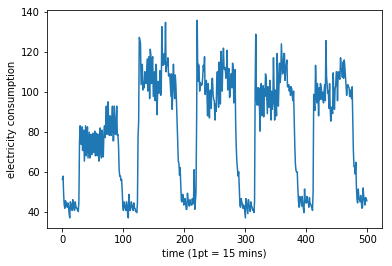

In [41]:
# 最初の10日間のデータをプロット
NUM_ENTRIES = 500
plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
plt.ylabel("electricity consumption")
plt.xlabel("time (1pt = 15 mins)")
plt.show()
# 96ptごとに1日
# これを見ると昼夜で周期的に電力使用量が変わっていることがわかる

In [42]:
data = data.reshape(-1, 1)  # データを縦ベクトルに
scaler = MinMaxScaler(feature_range=(0, 1), copy=False)
data = scaler.fit_transform(data)
data.shape

(140256, 1)

In [43]:
X = np.zeros((data.shape[0]-NUM_TIMESTEPS, NUM_TIMESTEPS))
for i in range(data.shape[0] - NUM_TIMESTEPS):
    # 1ずつ後ろにずらしてデータを作っている
    X[i] = data[i:i + NUM_TIMESTEPS].T  # データは縦ベクトルだったため転置して横ベクトルにしてる
X.shape

(140064, 192)

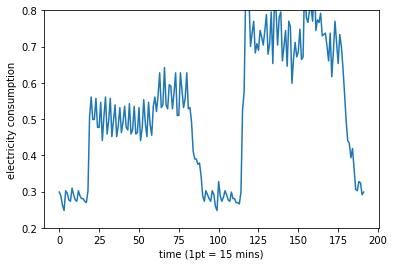

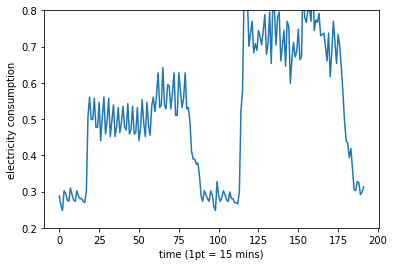

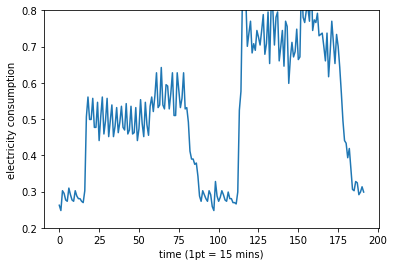

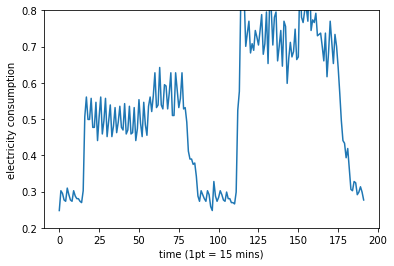

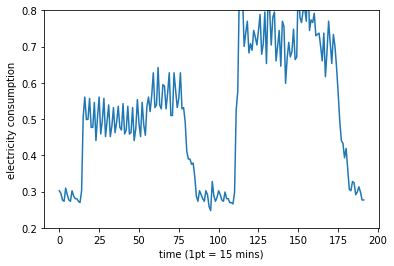

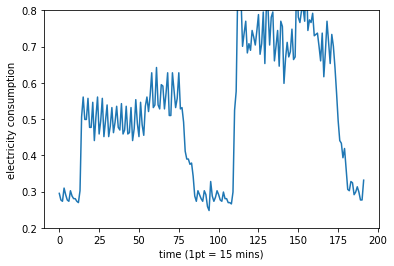

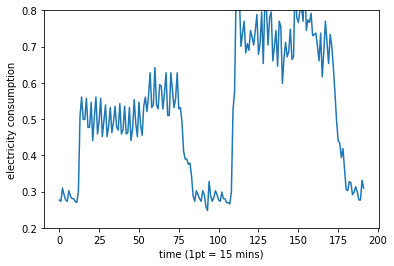

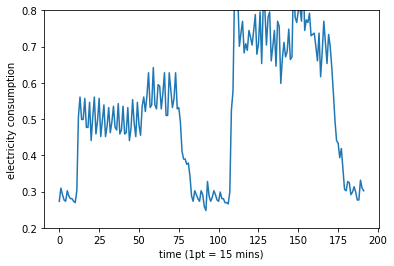

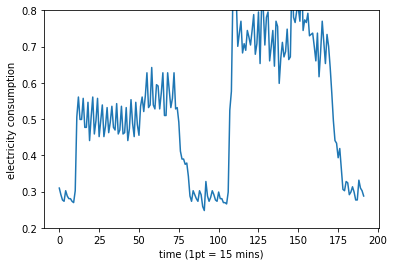

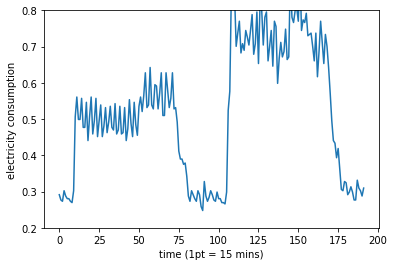

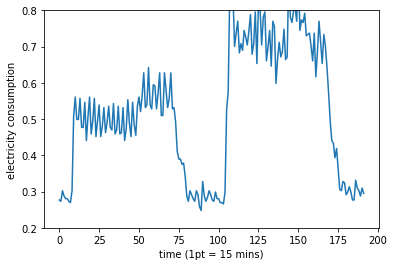

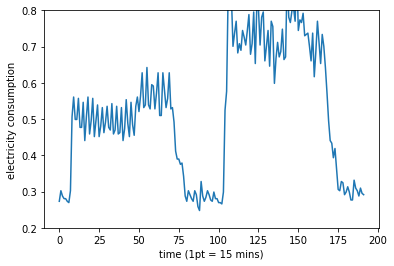

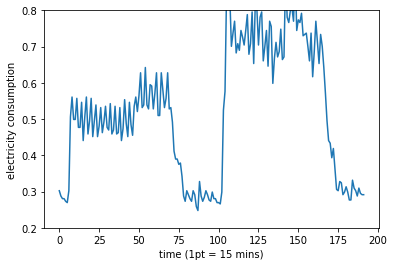

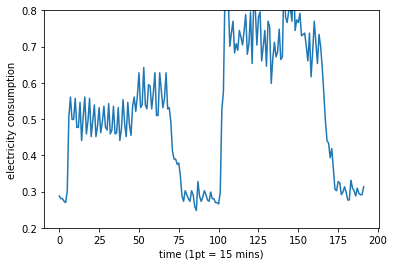

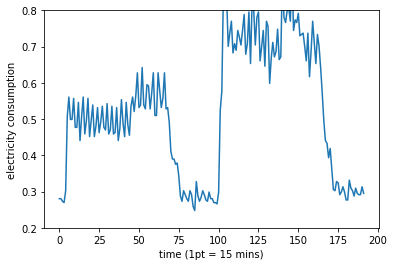

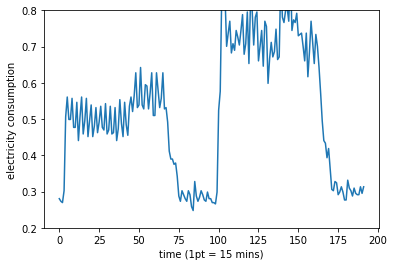

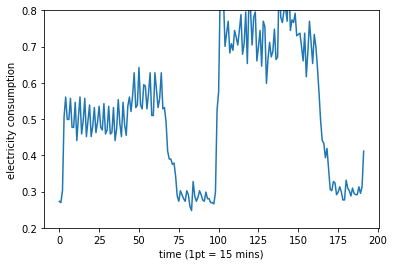

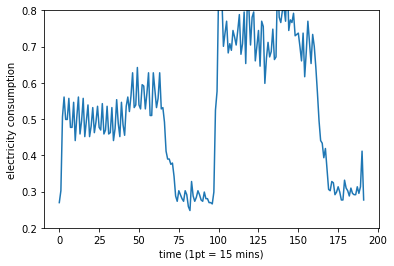

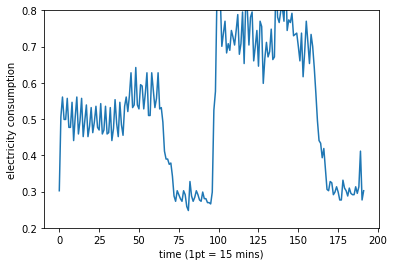

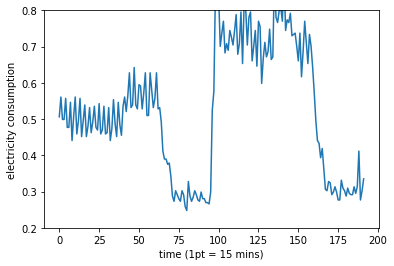

In [44]:
# データをプロット
for d in X[9:29]:
    plt.plot(range(d.shape[0]), d)
    plt.ylabel("electricity consumption")
    plt.xlabel("time (1pt = 15 mins)")
    plt.ylim([0.2,0.8])
    plt.show()